<a href="https://colab.research.google.com/github/LIONPANJSHIR/ML/blob/main/RedWine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [289]:
import warnings
warnings.filterwarnings('ignore')

In [656]:
pd.options.display.max_rows = 30

In [662]:
# wine_quality.data.original.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [228]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [229]:
import pandas as pd
df = pd.concat([X, y], axis=1)
df.head(5).T

,0,1,2,3,4
fixed_acidity,7.4000,7.8000,7.800,11.200,7.4000
volatile_acidity,0.7000,0.8800,0.760,0.280,0.7000
citric_acid,0.0000,0.0000,0.040,0.560,0.0000
residual_sugar,1.9000,2.6000,2.300,1.900,1.9000
chlorides,0.0760,0.0980,0.092,0.075,0.0760
free_sulfur_dioxide,11.0000,25.0000,15.000,17.000,11.0000
total_sulfur_dioxide,34.0000,67.0000,54.000,60.000,34.0000
density,0.9978,0.9968,0.997,0.998,0.9978
pH,3.5100,3.2000,3.260,3.160,3.5100
sulphates,0.5600,0.6800,0.650,0.580,0.5600


Pour plus d’informations, lire [Cortez et al., 2009].

Variables d’entrée (basées sur des tests physico-chimiques) :

 1 - acidité fixe

 2 - Acidité volatile

 3 - acide citrique

 4 - sucre résiduel

 5 - chlorures

 6 - dioxyde de soufre libre

 7 - dioxyde de soufre total

 8 - Densité

 9 - pH

 10 - sulfates

 11 - Alcool

Variable de sortie (basée sur les données sensorielles) :

 12 - Qualité (score entre 0 et 10)


## Structure of data

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


* No missing values
* We have 11 features in the dataset and 1 target (Quality)  and 6497 observations
* All the features are numeric : float64(11), int64(1)

In [231]:
df[df.duplicated()].shape[0]

1179

* we have 1179 duplicate, we gonna drop them

In [232]:
df.drop_duplicates(inplace=True)

In [233]:
df.shape

(5318, 12)

After removing duplicate we have only 5318 observation

## Descriptive statistics




In [461]:
# import matplotlib.font_manager as fm

# available_fonts = sorted(set([f.name for f in fm.fontManager.ttflist]))
# print(available_fonts)


['DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif Display', 'Humor Sans', 'Liberation Mono', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Serif', 'STIXGeneral', 'STIXNonUnicode', 'STIXSizeFiveSym', 'STIXSizeFourSym', 'STIXSizeOneSym', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'cmb10', 'cmex10', 'cmmi10', 'cmr10', 'cmss10', 'cmsy10', 'cmtt10']


In [235]:

import matplotlib as mpl

# Définir le style global
mpl.rcParams.update({
    # Police
    "font.family": "DejaVu Sans",  # fallback si Proxima Nova pas dispo

    # Titres
    "axes.titlesize": 12,  # Title (Bold, CMYK: 0/0/0/100)
    "axes.titleweight": "bold",

    # Labels des axes
    "axes.labelsize": 8,  # X-axis title & Y-axis title
    "axes.labelcolor": (0, 0, 0, 0.6),  # CMYK: 0/0/0/60 ~ gris foncé

    # Ticks (labels sur axes)
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "xtick.color": (0, 0, 0, 0.9),  # CMYK: 0/0/0/90
    "ytick.color": (0, 0, 0, 0.9),

    # Grille
    "grid.color": (0, 0, 0, 0.2),  # CMYK: 0/0/0/20
    "grid.linewidth": 0.5,
    "axes.grid": True,
    "axes.axisbelow": True,

    # Légende
    "legend.fontsize": 8,
    "legend.edgecolor": "none",

    # Épaisseur du contour
    "axes.linewidth": 0.5,

    # Figure
    "figure.titlesize": 9,  # Figure number
    "figure.dpi": 120,
})
palette = ['#18375F','#0072BC','#8EBEFF','#00B398','#666666','#8395B9' ,'#B8C9EE' ,'#E0E9FE']

### Target variable

Our target variable is quality, which is a discrete numerical feature.
It takes 7 unique values: 3, 4, 5, 6, 7, 8, and 9.

* The most frequent value is 6, representing 34.7% of the wines.

* Only 0.038% of the wines have a quality score greater than 8.


In [383]:
# Count the occurrences of each unique value in the 'quality' column
quality_counts = df['quality'].value_counts().reset_index()

# Rename the columns for clarity
quality_counts.columns = ['quality', 'count']

# Sort the DataFrame by quality level (optional, but good practice for plotting)
quality_counts = quality_counts.sort_values('count',ascending=False)

# Display the resulting DataFrame
display(quality_counts)

,quality,count
0,6,2323
1,5,1751
2,7,855
3,4,206
4,8,148
5,3,30
6,9,5


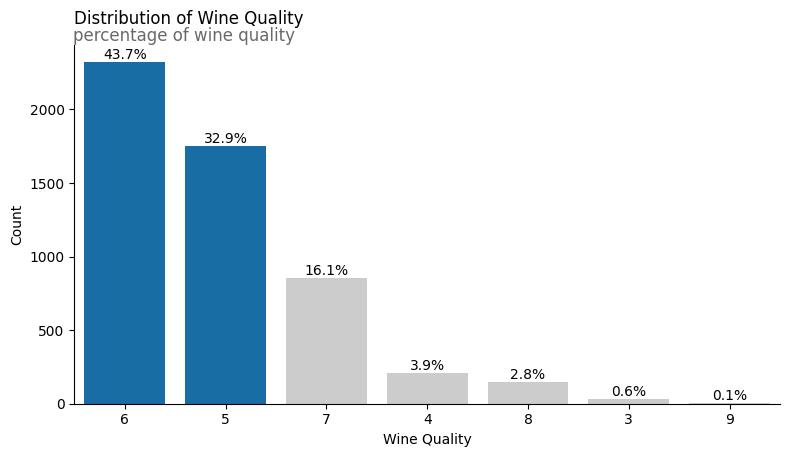

In [395]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(
    data=quality_counts,
    order=quality_counts["quality"],
    x="quality",
    y="count",
    hue="quality",
    palette={q: "#0072BC" if q in [5, 6] else "#CCCCCC" for q in quality_counts["quality"]},
    dodge=False,
    ax=ax
)

# Labels : soit count brut, soit pourcentage
total = quality_counts["count"].sum()
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"{(v.get_height()/total*100):.1f}%" for v in container],  # ← pourcentages
        # labels=[f"{int(v.get_height())}" for v in container],           # ← counts bruts
        label_type='edge',
        fontsize=10
    )

# Nettoyage
ax.set_title("Distribution of Wine Quality",loc ="left",pad=15)
plt.suptitle("percentage of wine quality ", y=0.87 , x=0.24 ,color ="dimgray")
ax.set_xlabel("Wine Quality")
ax.set_ylabel("Count")
ax.legend_.remove()
ax.yaxis.grid(False)
sns.despine(ax=ax)   # méthode Seaborn, enlève le haut et la droite
# ax.yaxis.set_visible(False)
plt.tight_layout()
plt.show()


### Features variables
####fixed_acidity

In [237]:
custom_palette = [
    "#00876c",  # vert foncé
    "#5fa76c",  # vert clair
    "#a6c46f",  # jaune-vert
    "#f1dd7c",  # jaune
    "#f1ab58",  # orange clair
    "#e8764c",  # orange foncé
    "#d43d51"   # rouge
]


/tmp/ipython-input-2417233025.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


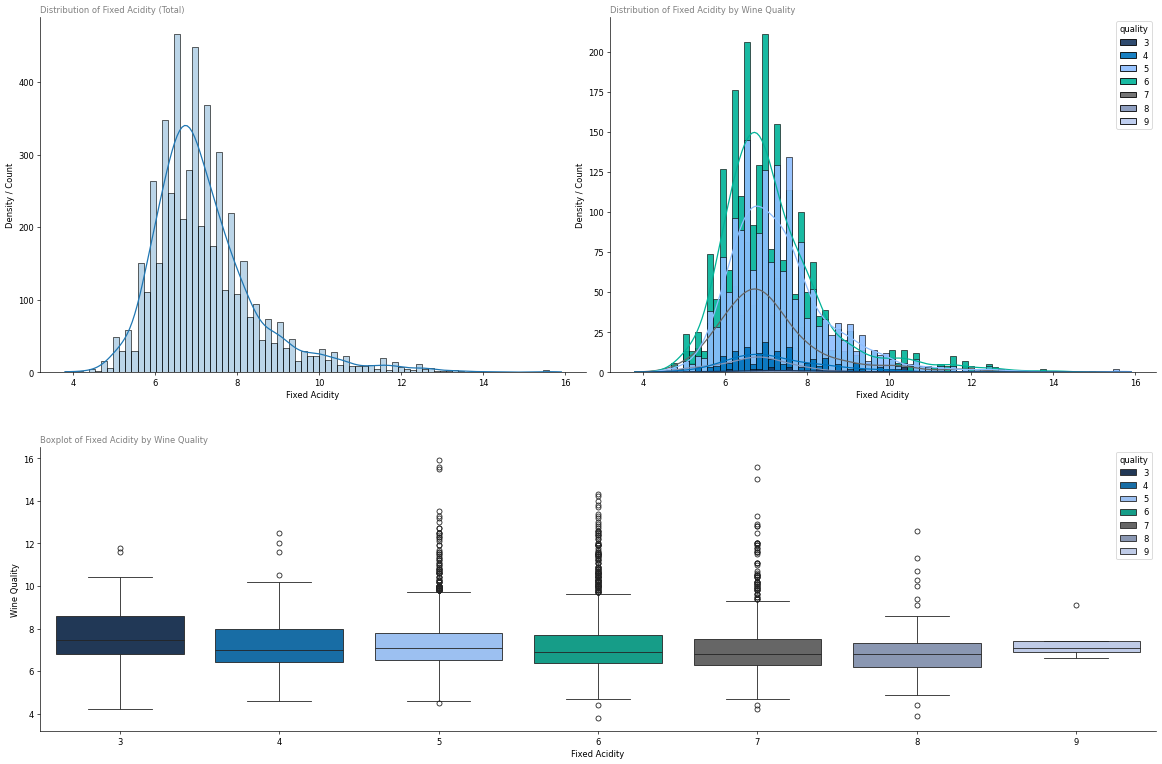

In [270]:
fig = plt.figure(figsize=(24,17), dpi=60)
gs = fig.add_gridspec(11,24)
gs.update(wspace=1, hspace=0.05)

# Subplots
ax2 = fig.add_subplot(gs[1:6,0:12])
ax1 = fig.add_subplot(gs[1:6,12:])
ax3 = fig.add_subplot(gs[7:,0:])   # Boxplot ici

# --- Histogramme global ---
sns.histplot(
    data=df,
    x="fixed_acidity",
    kde=True,
    alpha=0.3,
    ax=ax2
)
ax2.set_title("Distribution of Fixed Acidity (Total)", fontsize=10, loc="left", color="grey")
ax2.set_xlabel("Fixed Acidity")
ax2.set_ylabel("Density / Count")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.yaxis.grid(False)
ax2.xaxis.grid(False)

# --- Histogramme groupé par qualité ---
sns.histplot(
    data=df,
    x="fixed_acidity",
    hue="quality",
    kde=True,
    palette=palette[0:7],
    alpha=0.9,
    ax=ax1
)
ax1.set_title("Distribution of Fixed Acidity by Wine Quality", fontsize=10, loc="left", color="grey")
ax1.set_xlabel("Fixed Acidity")
ax1.set_ylabel("Density / Count")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.yaxis.grid(False)
ax1.xaxis.grid(False)



# --- Boxplot global (ax3) ---
sns.boxplot(
    data=df,
    y="fixed_acidity",
    hue = "quality",
    x="quality",
    palette=palette[0:7],
    ax=ax3
)
ax3.set_title("Boxplot of Fixed Acidity by Wine Quality", fontsize=10, loc="left", color="grey")
ax3.set_xlabel("Fixed Acidity")
ax3.set_ylabel("Wine Quality")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [266]:
len(palette[0:6])

6

Le graphique que vous voyez visualise la distribution de l'« acidité fixe » dans l'ensemble de données sur le vin. Le sous-graphique de gauche montre la distribution globale de l'acidité fixe pour tous les échantillons de vin, tandis que le sous-graphique de droite décompose cette distribution par qualité de vin.

*   **Sous-graphique de gauche (Distribution de l'acidité fixe (Totale))** : Cet histogramme montre que la distribution de l'acidité fixe est quelque peu asymétrique vers la droite, avec un pic autour de 7-8. Il y a une longue queue s'étendant vers des valeurs d'acidité fixe plus élevées.
*   **Sous-graphique de droite (Distribution de l'acidité fixe par qualité de vin)** : Ce graphique nous permet de comparer la distribution de l'acidité fixe pour différents niveaux de qualité de vin. Vous pouvez observer que :
    *   Les vins de qualité inférieure (3 et 4) ont tendance à avoir une gamme plus étendue de valeurs d'acidité fixe, y compris des valeurs très élevées.
    *   Les vins de qualité supérieure (7 et 8) semblent avoir une gamme d'acidité fixe légèrement plus étroite, avec des pics généralement décalés vers des valeurs légèrement inférieures par rapport à la distribution globale.
    *   Les distributions pour les qualités 5 et 6 sont assez similaires et ressemblent étroitement à la distribution globale, ce qui est attendu car ces niveaux de qualité représentent la majorité des vins.
    *   Les vins de qualité 9 sont peu nombreux, mais leurs valeurs d'acidité fixe semblent être concentrées dans une gamme relativement étroite.

Cela suggère que bien qu'il y ait un chevauchement dans l'acidité fixe entre les différents niveaux de qualité, une acidité fixe extrêmement élevée pourrait être plus courante dans les vins de qualité inférieure, et les vins de qualité supérieure pourraient avoir tendance à avoir des valeurs d'acidité fixe dans une gamme plus modérée.

In [239]:
df.groupby("quality")["fixed_acidity"].describe().T.drop("count",axis =0)##.style.background_gradient(cmap='Blues')

quality,3,4,5,6,7,8,9
mean,7.853333,7.304369,7.334066,7.169027,7.122515,6.820270,7.420000
std,1.747853,1.284288,1.278269,1.312745,1.404859,1.195226,0.983362
min,4.200000,4.600000,4.500000,3.800000,4.200000,3.900000,6.600000
25%,6.800000,6.425000,6.500000,6.400000,6.300000,6.200000,6.900000
50%,7.450000,7.000000,7.100000,6.900000,6.800000,6.800000,7.100000
75%,8.575000,8.000000,7.800000,7.700000,7.500000,7.300000,7.400000
max,11.800000,12.500000,15.900000,14.300000,15.600000,12.600000,9.100000


* En moyenne ont remarque que le vin de meilleur qualité > 6 l'acidité est en dessous de 7.2 hormis les vins de qualité 9 (peu observer moins de 0.1 %) qui ont une acidité superieur a cette dernière  cependant a mon avis la différence n'est pas significative (hyphothese a tester )

#### volatile_acidity

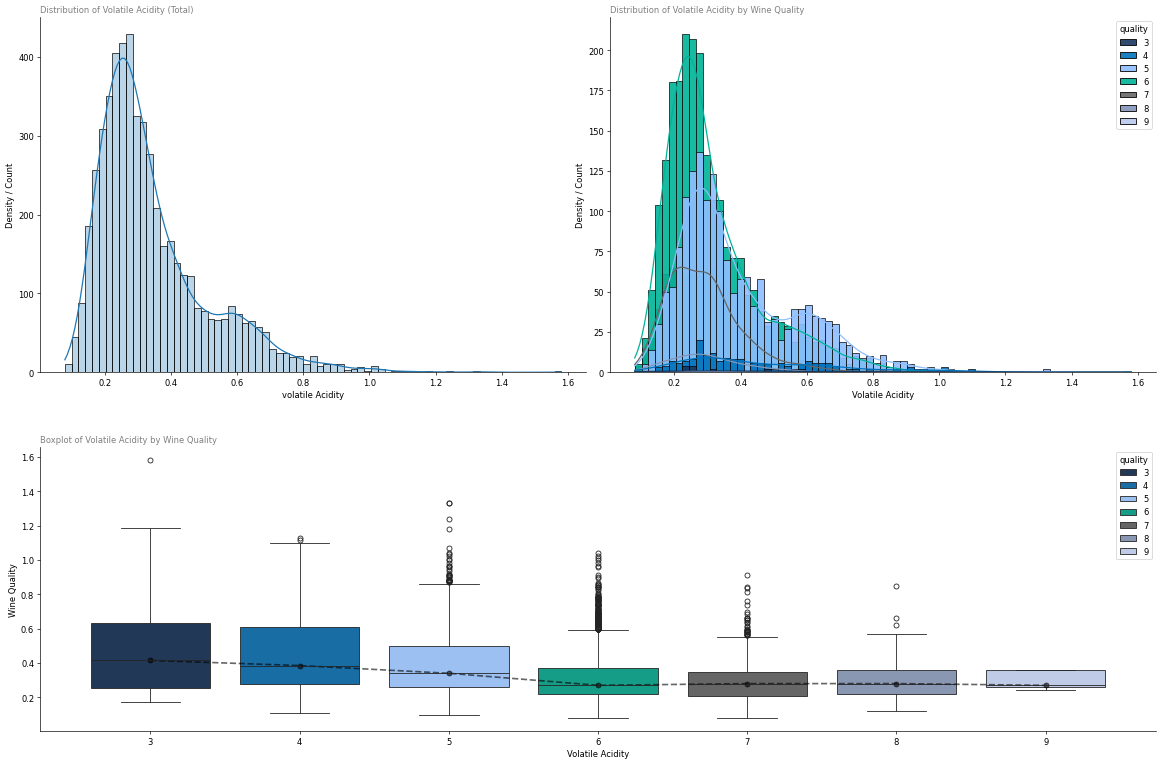

In [303]:
fig = plt.figure(figsize=(24,17), dpi=60)
gs = fig.add_gridspec(11,24)
gs.update(wspace=1, hspace=0.05)

# Subplots
ax2 = fig.add_subplot(gs[1:6,0:12])
ax1 = fig.add_subplot(gs[1:6,12:])
ax3 = fig.add_subplot(gs[7:,0:])   # Boxplot ici

# --- Histogramme global ---
sns.histplot(
    data=df,
    x="volatile_acidity",
    kde=True,
    alpha=0.3,
    ax=ax2
)
ax2.set_title("Distribution of Volatile Acidity (Total)", fontsize=10, loc="left", color="grey")
ax2.set_xlabel("volatile Acidity")
ax2.set_ylabel("Density / Count")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.yaxis.grid(False)
ax2.xaxis.grid(False)

# --- Histogramme groupé par qualité ---
sns.histplot(
    data=df,
    x="volatile_acidity",
    hue="quality",
    kde=True,
    palette=palette[0:7],
    alpha=0.9,
    ax=ax1
)
ax1.set_title("Distribution of Volatile Acidity by Wine Quality", fontsize=10, loc="left", color="grey")
ax1.set_xlabel("Volatile Acidity")
ax1.set_ylabel("Density / Count")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.yaxis.grid(False)
ax1.xaxis.grid(False)



# --- Boxplot global (ax3) ---
sns.boxplot(
    data=df,
    y="volatile_acidity",
    hue = "quality",
    x="quality",
    palette=palette[0:7],
    ax=ax3
)
medians = df.groupby("quality")["volatile_acidity"].median()

ax3.plot(
    range(len(medians)),  # positions sur l'axe x
    medians.values,       # valeurs des médianes
    color="black",
    alpha=0.6,
    marker="o",
    linestyle="--",
    linewidth=2,
    label="Médiane"
)
ax3.set_title("Boxplot of Volatile Acidity by Wine Quality", fontsize=10, loc="left", color="grey")
ax3.set_xlabel("Volatile Acidity")
ax3.set_ylabel("Wine Quality")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [277]:
df['volatile_acidity'].describe()

,volatile_acidity
count,5318.000000
mean,0.344171
std,0.168264
min,0.080000
25%,0.230000
50%,0.300000
75%,0.410000
max,1.580000


In [275]:
df.groupby("quality")["volatile_acidity"].describe().T.drop("count",axis =0)##.style.background_gradient(cmap='Blues')

quality,3,4,5,6,7,8,9
mean,0.517000,0.462379,0.394086,0.315626,0.292357,0.302973,0.298000
std,0.341913,0.232336,0.182819,0.148506,0.117202,0.118155,0.057619
min,0.170000,0.110000,0.100000,0.080000,0.080000,0.120000,0.240000
25%,0.252500,0.280000,0.260000,0.220000,0.210000,0.220000,0.260000
50%,0.415000,0.385000,0.340000,0.270000,0.280000,0.280000,0.270000
75%,0.632500,0.610000,0.500000,0.370000,0.350000,0.360000,0.360000
max,1.580000,1.130000,1.330000,1.040000,0.915000,0.850000,0.360000


* La variable posedent une longue traine a droite (Asymétrie à droite )
* Ont note que plus la qualité augmente plus acidité volatile diminue en moyenne

*   **Tendance générale** : En regardant la ligne de la **moyenne**, on observe une tendance claire : l'acidité volatile moyenne diminue à mesure que la qualité du vin augmente. Les vins de faible qualité (3 et 4) ont une acidité volatile moyenne plus élevée (autour de 0.517 et 0.462), tandis que les vins de meilleure qualité (7, 8, et 9) ont une acidité volatile moyenne plus faible (autour de 0.292, 0.303, et 0.298). Cela suggère que l'acidité volatile est un indicateur important de la qualité du vin, des niveaux plus bas étant généralement associés à une meilleure qualité.

*   **Dispersion (Écart-type et IQR)** : L'**écart-type (std)** et l'**IQR (calculé comme Q3 - Q1)** donnent une idée de la dispersion des valeurs d'acidité volatile pour chaque niveau de qualité.
    *   Les vins de qualité inférieure (3 et 4) montrent une plus grande variabilité de l'acidité volatile (écarts-types plus élevés), ce qui indique que les valeurs sont plus étalées.
    *   Les vins de qualité supérieure (7, 8, et 9) ont tendance à avoir une moindre variabilité (écarts-types plus faibles), ce qui signifie que les valeurs d'acidité volatile sont plus regroupées autour de la moyenne pour ces vins.

*   **Distribution (Médiane, Q1, Q3, Min, Max)** :
    *   La **médiane (50%)** confirme la tendance observée avec la moyenne : la valeur médiane de l'acidité volatile diminue également avec l'augmentation de la qualité.
    *   Les valeurs **minimum** et **maximum** montrent la plage de l'acidité volatile pour chaque groupe. On peut noter que les vins de qualité inférieure peuvent avoir des valeurs maximales d'acidité volatile très élevées (par exemple, 1.58 pour la qualité 3), ce qui est beaucoup moins fréquent dans les vins de meilleure qualité. Les vins de qualité meilleure qualité (7, 8, et 9) ont une plage d'acidité volatile particulièrement étroite.
    *   Les **quartiles (Q1 et Q3)** délimitent l'étendue des 50% centraux des données pour chaque groupe et renforcent les observations sur la dispersion. Pour les vins de meilleure qualité, l'intervalle entre Q1 et Q3 est plus petit.

En résumé, ces statistiques descriptives suggèrent fortement qu'une acidité volatile plus faible est corrélée à une meilleure qualité de vin dans cet ensemble de données. La distribution de l'acidité volatile devient également moins variable à mesure que la qualité du vin s'améliore.

| Symptôme observé                 | Hypothèse sur la distribution                                                 |
| -------------------------------- | ----------------------------------------------------------------------------- |
| **Moyenne ≈ Médiane (50%)**      | Distribution symétrique (souvent normale).                                    |
| **Moyenne > Médiane**            | Asymétrie à droite (skewness positive, queue longue vers le max).             |
| **Moyenne < Médiane**            | Asymétrie à gauche (skewness négative, queue longue vers le min).             |
| **Écart-type (std) petit**       | Données homogènes, peu dispersées.                                            |
| **Écart-type (std) grand**       | Données hétérogènes, forte dispersion.                                        |
| **Max très éloigné de Q3**       | Outliers ou queue longue à droite.                                            |
| **Min très éloigné de Q1**       | Outliers ou queue longue à gauche.                                            |
| **IQR (Q3 – Q1) petit**          | Valeurs concentrées autour de la médiane.                                     |
| **IQR (Q3 – Q1) grand**          | Valeurs étalées (forte variabilité).                                          |
| **Q3 >> Q2 > Q1**                | Distribution étirée vers la droite.                                           |
| **Q1 << Q2 < Q3**                | Distribution étirée vers la gauche.                                           |
| **Amplitude (max – min) >> std** | Forte probabilité d’outliers.                                                 |
| **Q1 ≈ Q2 ≈ Q3**                 | Beaucoup de valeurs regroupées autour de la médiane (distribution resserrée). |



In [290]:
import scipy.stats as stats
import scikit_posthocs as sp  # Pour les tests post-hoc

# Installer scikit-posthocs si nécessaire
# !pip install scikit-posthocs

# Assurer que 'quality' est catégorique
df['quality'] = df['quality'].astype('category')

# --- Création des groupes de volatile_acidity par niveau de qualité ---
groupes_qualite = df.groupby('quality')['volatile_acidity'].apply(list)

# --- Test de Levene pour l'homogénéité des variances ---
stat_levene, p_levene = stats.levene(*groupes_qualite)

print(f"Statistique du test de Levene : {stat_levene:.4f}")
print(f"P-value du test de Levene : {p_levene:.4f}")

alpha = 0.05
if p_levene < alpha:
    print("Les variances de l'acidité volatile ne sont pas homogènes entre les niveaux de qualité (on rejette H0).")
else:
    print("Les variances de l'acidité volatile sont homogènes entre les niveaux de qualité (on ne rejette pas H0).")

print("-" * 30)

# --- Test de Kruskal-Wallis ---
stat_kruskal, p_kruskal = stats.kruskal(*groupes_qualite)

print(f"Statistique du test de Kruskal-Wallis : {stat_kruskal:.4f}")
print(f"P-value du test de Kruskal-Wallis : {p_kruskal:.4f}")

if p_kruskal < alpha:
    print("Différence statistiquement significative de l'acidité volatile entre au moins un pair de niveaux de qualité (on rejette H0).")
else:
    print("Pas de différence statistiquement significative de l'acidité volatile entre les niveaux de qualité (on ne rejette pas H0).")

print("-" * 30)

# --- Tests post-hoc de Dunn avec correction Holm ---
tests_posthoc = sp.posthoc_dunn(df, val_col='volatile_acidity', group_col='quality', p_adjust='holm')

print("Tests post-hoc de Dunn (correction Holm) :")
print(tests_posthoc)


Statistique du test de Levene : 42.8989
P-value du test de Levene : 0.0000
Les variances de l'acidité volatile ne sont pas homogènes entre les niveaux de qualité (on rejette H0).
------------------------------
Statistique du test de Kruskal-Wallis : 384.0193
P-value du test de Kruskal-Wallis : 0.0000
Différence statistiquement significative de l'acidité volatile entre au moins un pair de niveaux de qualité (on rejette H0).
------------------------------
Tests post-hoc de Dunn (correction Holm) :
          3             4             5             6             7  \
3  1.000000  1.000000e+00  1.000000e+00  3.496814e-03  6.217391e-04   
4  1.000000  1.000000e+00  1.106497e-02  5.467414e-23  3.154633e-25   
5  1.000000  1.106497e-02  1.000000e+00  2.393490e-53  8.135066e-43   
6  0.003497  5.467414e-23  2.393490e-53  1.000000e+00  2.971755e-01   
7  0.000622  3.154633e-25  8.135066e-43  2.971755e-01  1.000000e+00   
8  0.011249  2.411903e-10  2.815339e-07  1.000000e+00  1.000000e+00   
9 

#### Acide citrique

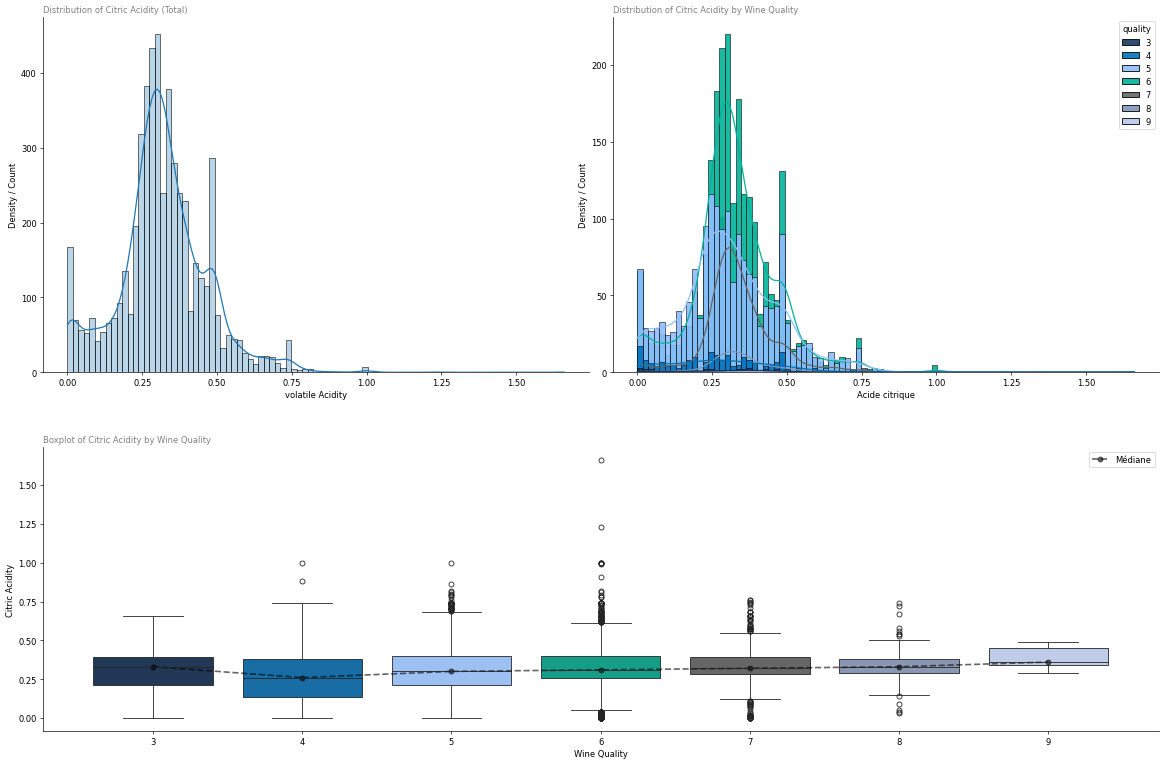

In [300]:
fig = plt.figure(figsize=(24,17), dpi=60)
gs = fig.add_gridspec(11,24)
gs.update(wspace=1, hspace=0.05)

# Subplots
ax2 = fig.add_subplot(gs[1:6,0:12])
ax1 = fig.add_subplot(gs[1:6,12:])
ax3 = fig.add_subplot(gs[7:,0:])   # Boxplot ici

# --- Histogramme global ---
sns.histplot(
    data=df,
    x="citric_acid",
    kde=True,
    alpha=0.3,
    ax=ax2
)
ax2.set_title("Distribution of Citric Acidity (Total)", fontsize=10, loc="left", color="grey")
ax2.set_xlabel("volatile Acidity")
ax2.set_ylabel("Density / Count")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.yaxis.grid(False)
ax2.xaxis.grid(False)

# --- Histogramme groupé par qualité ---
sns.histplot(
    data=df,
    x="citric_acid",
    hue="quality",
    kde=True,
    palette=palette[0:7],
    alpha=0.9,
    ax=ax1
)
ax1.set_title("Distribution of Citric Acidity by Wine Quality", fontsize=10, loc="left", color="grey")
ax1.set_xlabel("Acide citrique")
ax1.set_ylabel("Density / Count")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.yaxis.grid(False)
ax1.xaxis.grid(False)



# --- Boxplot global (ax3) ---
# --- Boxplot global (ax3) ---
sns.boxplot(
    data=df,
    x="quality",
    y="citric_acid",
    palette=palette[0:7],
    ax=ax3
)

# Calculer les médianes par qualité
medians = df.groupby("quality")["citric_acid"].median()

# Tracer une ligne reliant les médianes
ax3.plot(
    range(len(medians)),  # positions sur l'axe x
    medians.values,       # valeurs des médianes
    color="black",
    alpha=0.6,
    marker="o",
    linestyle="--",
    linewidth=2,
    label="Médiane"
)

ax3.set_title("Boxplot of Citric Acidity by Wine Quality", fontsize=10, loc="left", color="grey")
ax3.set_xlabel("Wine Quality")
ax3.set_ylabel("Citric Acidity")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.legend()


plt.tight_layout()
plt.show()


Le graphique que vous avez généré visualise la distribution de l'acide citrique pour les différents niveaux de qualité de vin.

*   **Sous-graphique de gauche (Distribution de l'acide citrique (Totale))** : L'histogramme global montre que la distribution de l'acide citrique est asymétrique à droite, avec une concentration importante de vins ayant un faible taux d'acide citrique (autour de 0 et 0.2). Il y a une longue queue s'étendant vers des valeurs plus élevées. La présence d'un pic à 0 indique qu'un nombre non négligeable de vins n'ont pas d'acide citrique détectable.

*   **Sous-graphique de droite (Distribution de l'acide citrique par qualité de vin)** : Ce graphique superpose les distributions d'acide citrique pour chaque niveau de qualité. On peut observer plusieurs tendances :
    *   Les vins de **qualité inférieure (3 et 4)** ont tendance à avoir une distribution plus fortement concentrée vers des valeurs d'acide citrique faibles, avec une proportion plus importante de vins ayant 0 acide citrique.
    *   À mesure que la **qualité du vin augmente (de 5 à 8)**, la distribution de l'acide citrique semble se déplacer vers des valeurs plus élevées. Les pics des distributions se décalent progressivement vers la droite, indiquant que les vins de meilleure qualité ont généralement des niveaux d'acide citrique plus élevés.
    *   Les vins de **qualité 9**, bien que peu nombreux, semblent avoir une distribution d'acide citrique plus concentrée autour de valeurs moyennes à légèrement supérieures par rapport aux qualités inférieures.

*   **Boxplot (Boxplot de l'acide citrique par qualité de vin)** : Le boxplot confirme visuellement ces tendances.
    *   La **médiane** (représentée par la ligne en pointillé) montre une augmentation progressive de l'acide citrique médian à mesure que la qualité du vin s'améliore (de 3 à 8).
    *   Les **boîtes** (IQR) et les **moustaches** indiquent également que la plage typique des valeurs d'acide citrique est plus élevée pour les vins de meilleure qualité.
    *   On observe la présence d'**outliers** (points individuels au-delà des moustaches) pour la plupart des niveaux de qualité, mais ils ne semblent pas masquer la tendance générale d'augmentation de l'acide citrique avec la qualité.

En conclusion, il semble y avoir une relation positive entre l'acide citrique et la qualité du vin dans cet ensemble de données : les vins de meilleure qualité ont tendance à avoir des niveaux d'acide citrique plus élevés.

#### Sucre résiduel

In [ ]:
import textwrap

# Ton texte brut
summary_text = (
    "Most wines have very little residual sugar (below 5), with a long tail towards sweeter wines. "
    "When broken down by quality, no clear linear trend emerges: wines rated 5 and 6 mirror the global pattern, "
    "while lower (3–4) and higher (7–8) qualities show more variability. "
    "The boxplot confirms: medians fluctuate without a consistent direction, "
    "and high-sugar outliers appear across many quality levels."
)

# Formater avec largeur fixe (ex: 110 caractères)
wrapped_text = textwrap.fill(summary_text, width=110)



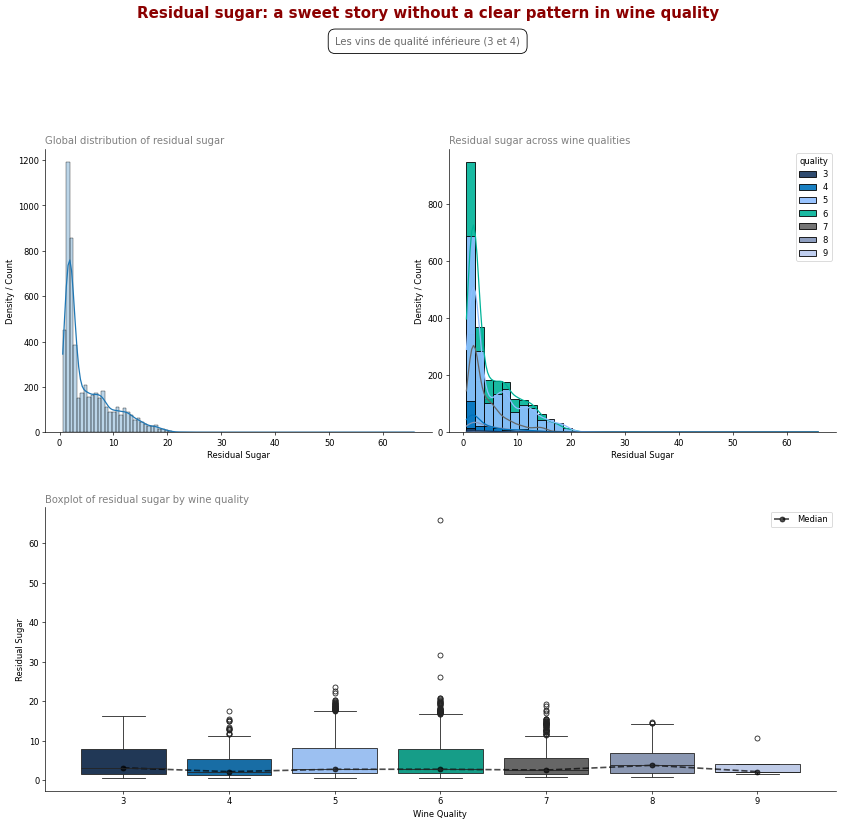

In [586]:
fig = plt.figure(figsize=(17,17), dpi=60)
gs = fig.add_gridspec(11,24)
gs.update(wspace=1, hspace=0.05)

# Subplots
ax2 = fig.add_subplot(gs[2:6,0:12])
ax1 = fig.add_subplot(gs[2:6,12:])
ax3 = fig.add_subplot(gs[7:,0:])   # Boxplot ici

# --- Histogramme global ---
sns.histplot(
    data=df,
    x="residual_sugar",
    kde=True,
    alpha=0.3,
    ax=ax2
)
ax2.set_title("Global distribution of residual sugar", fontsize=12, loc="left", color="grey")
ax2.set_xlabel("Residual Sugar")
ax2.set_ylabel("Density / Count")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.yaxis.grid(False)
ax2.xaxis.grid(False)

# --- Histogramme groupé par qualité ---
sns.histplot(
    data=df,
    x="residual_sugar",
    hue="quality",
    bins=40,
    kde=True,
    palette=palette[0:7],
    alpha=0.9,
    ax=ax1
)
ax1.set_title("Residual sugar across wine qualities", fontsize=12, loc="left", color="grey")
ax1.set_xlabel("Residual Sugar")
ax1.set_ylabel("Density / Count")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.yaxis.grid(False)
ax1.xaxis.grid(False)

# --- Boxplot global (ax3) ---
sns.boxplot(
    data=df,
    x="quality",
    y="residual_sugar",
    palette=palette[0:7],
    ax=ax3
)

# Calculer les médianes par qualité
medians = df.groupby("quality")["residual_sugar"].median()

# Tracer une ligne reliant les médianes
ax3.plot(
    range(len(medians)),  # positions sur l'axe x
    medians.values,       # valeurs des médianes
    color="black",
    alpha=0.7,
    marker="o",
    linestyle="--",
    linewidth=2,
    label="Median"
)

ax3.set_title("Boxplot of residual sugar by wine quality", fontsize=12, loc="left", color="grey")
ax3.set_xlabel("Wine Quality")
ax3.set_ylabel("Residual Sugar")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.legend()

# --- Titre global storytelling ---
fig.suptitle(
    "Residual sugar: a sweet story without a clear pattern in wine quality",
    fontsize=18,
    fontweight="bold",
    color="darkred",
    y=0.88
)

# --- Résumé narratif sous la figure ---
# Affichage uniforme centré
fig.text(
    0.5, 0.85,  # Position verticale à ajuster selon ton layout
    wrapped_text,
    ha="center", va="top",
    fontsize=12,
    color="dimgray" ,
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.7")
)


plt.tight_layout(rect=[0, 0, 1, 0.94])  # espace pour le titre
plt.show()


Lorsque l’on observe la distribution globale du sucre résiduel, une image très nette apparaît. La grande majorité des vins contiennent peu de sucre, souvent moins de 5 grammes par litre. Pourtant, une longue traîne s’étend vers la droite : quelques vins, beaucoup plus rares, affichent des teneurs en sucre résiduel extrêmement élevées. Ce sont sans doute des vins doux ou liquoreux, minoritaires mais bien présents dans l’échantillon.

En séparant maintenant les courbes selon la qualité du vin, le tableau devient plus nuancé. Les qualités les plus fréquentes – 5 et 6 – se superposent presque parfaitement à la distribution globale : là encore, la majorité reste sur de faibles valeurs de sucre. En revanche, aux extrêmes, les choses se compliquent. Les vins de qualité inférieure (3 et 4), mais aussi ceux considérés comme supérieurs (7 et 8), présentent une variabilité bien plus importante. Certains dépassent largement les valeurs habituelles, comme si le sucre pouvait jouer des rôles très différents selon le type de vin. Quant à la qualité 9, rarissime, elle apparaît comme une petite exception discrète, centrée sur des valeurs faibles et homogènes.

Enfin, le boxplot vient confirmer cette impression : aucune trajectoire simple ne relie le sucre résiduel à la qualité du vin. La ligne des médianes ne dessine ni une montée progressive ni une chute régulière ; elle oscille, sans logique apparente. Les boîtes elles-mêmes s’élargissent, les moustaches s’étirent, et surtout, les outliers abondent. Ces points isolés, parfois très élevés, rappellent que des teneurs importantes en sucre peuvent se rencontrer à presque tous les niveaux de qualité.

En somme, contrairement à l’acidité volatile ou à l’acide citrique, le sucre résiduel refuse de raconter une histoire linéaire. Il joue un rôle plus subtil, peut-être contextuel, qui ne suffit pas, à lui seul, à prédire la qualité d’un vin.

#### Les chlorures dans le vin , de quoi s'agit-il exactement ?
Les [chlorures](https://search.oeno.tm.fr/search/article/AVprsHK0YaAqBff0Bq-T) dans le vin, principalement le chlorure de sodium (NaCl), sont des matières minérales naturelles présentes dans la vigne. Leur concentration dépend des conditions géographiques, géologiques et climatiques de culture. En général, le taux est inférieur à 60 mg/l, mais peut exceptionnellement dépasser le gramme par litre dans des régions comme les bords de mer. Ces chlorures peuvent influencer les propriétés organoleptiques du vin, notamment en modifiant l'acidité, l'amertume et la sucrosité, ainsi que les perceptions d'alcool et d'astringence

Intéressons nous maintenat que de la **tenure de chlorure** sur notre base de donnée et essayons de tiré des conclusions si possible

In [555]:
chloride = df.groupby("quality")["chlorides"].mean().reset_index()
chloride.sort_values(by = "chlorides",ascending = False , inplace = True)
chloride = pd.DataFrame(chloride)
# chloride

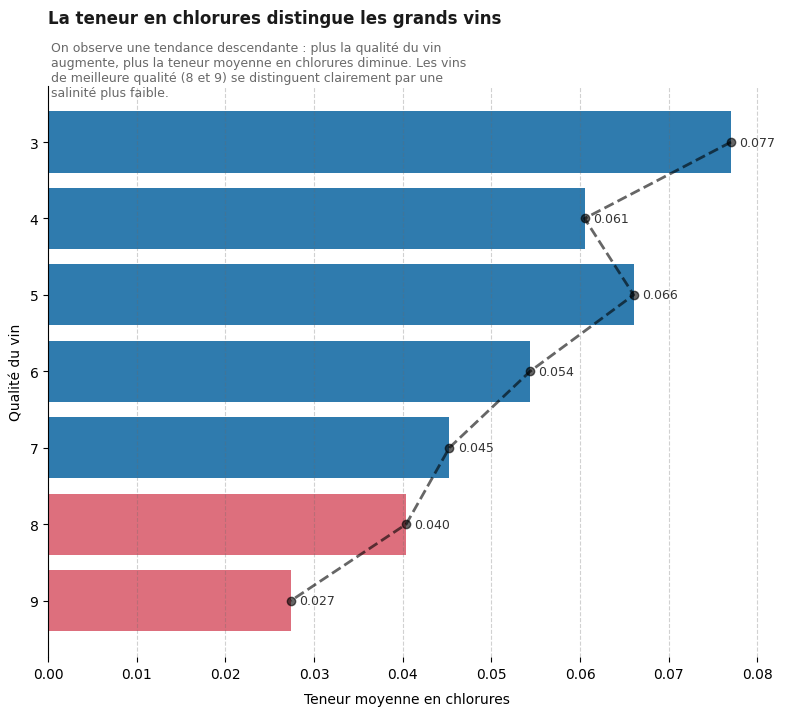

In [557]:
fig, ax = plt.subplots(figsize=(8,8))

# Palette conditionnelle (meilleures qualités en rouge, autres en bleu)
colors = ["#EF4A60" if q in [8, 9] else "#0072BC" for q in chloride["quality"]]

# Barplot horizontal
sns.barplot(
    data=chloride,
    y="quality",
    x="chlorides",
    palette=colors,
    ax=ax,
    order=sorted(chloride["quality"].unique()),
    alpha=0.9
)

# Ligne de tendance (moyennes)
means = chloride.groupby("quality")["chlorides"].mean()
ax.plot(
    means.values,
    range(len(means)),
    color="black",
    marker="o",
    linestyle="--",
    linewidth=2,
    alpha=0.6,
    label="Tendance"
)

# Suppression spines top/right
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.grid(True , ls ='--' , alpha=0.3 , color ="dimgray")

# Labels et titres
ax.set_xlabel("Teneur moyenne en chlorures", fontsize=10, labelpad=8)
ax.set_ylabel("Qualité du vin", fontsize=10)
ax.set_title(
    "La teneur en chlorures distingue les grands vins",
    loc="left",
    fontdict={"color": "#1a1a1a","family":"DejaVu Sans","weight":"bold","size":12},
    pad=45
)

# Labels sur les barres
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"{v.get_width():.3f}" for v in container],
        label_type='edge',
        fontsize=9,
        padding=6,
        color="#333333"
    )

# Sous-titre narratif
fig.suptitle(
    textwrap.fill(
        "On observe une tendance descendante : plus la qualité du vin augmente, "
        "plus la teneur moyenne en chlorures diminue. "
        "Les vins de meilleure qualité (8 et 9) se distinguent clairement par une salinité plus faible.",
        width=65
    ),
    fontsize=9,
    fontweight="regular",
    color="dimgray",
    x=0.07, y=0.85, ha="left"
)

plt.tight_layout()
plt.show()


In [562]:
df.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


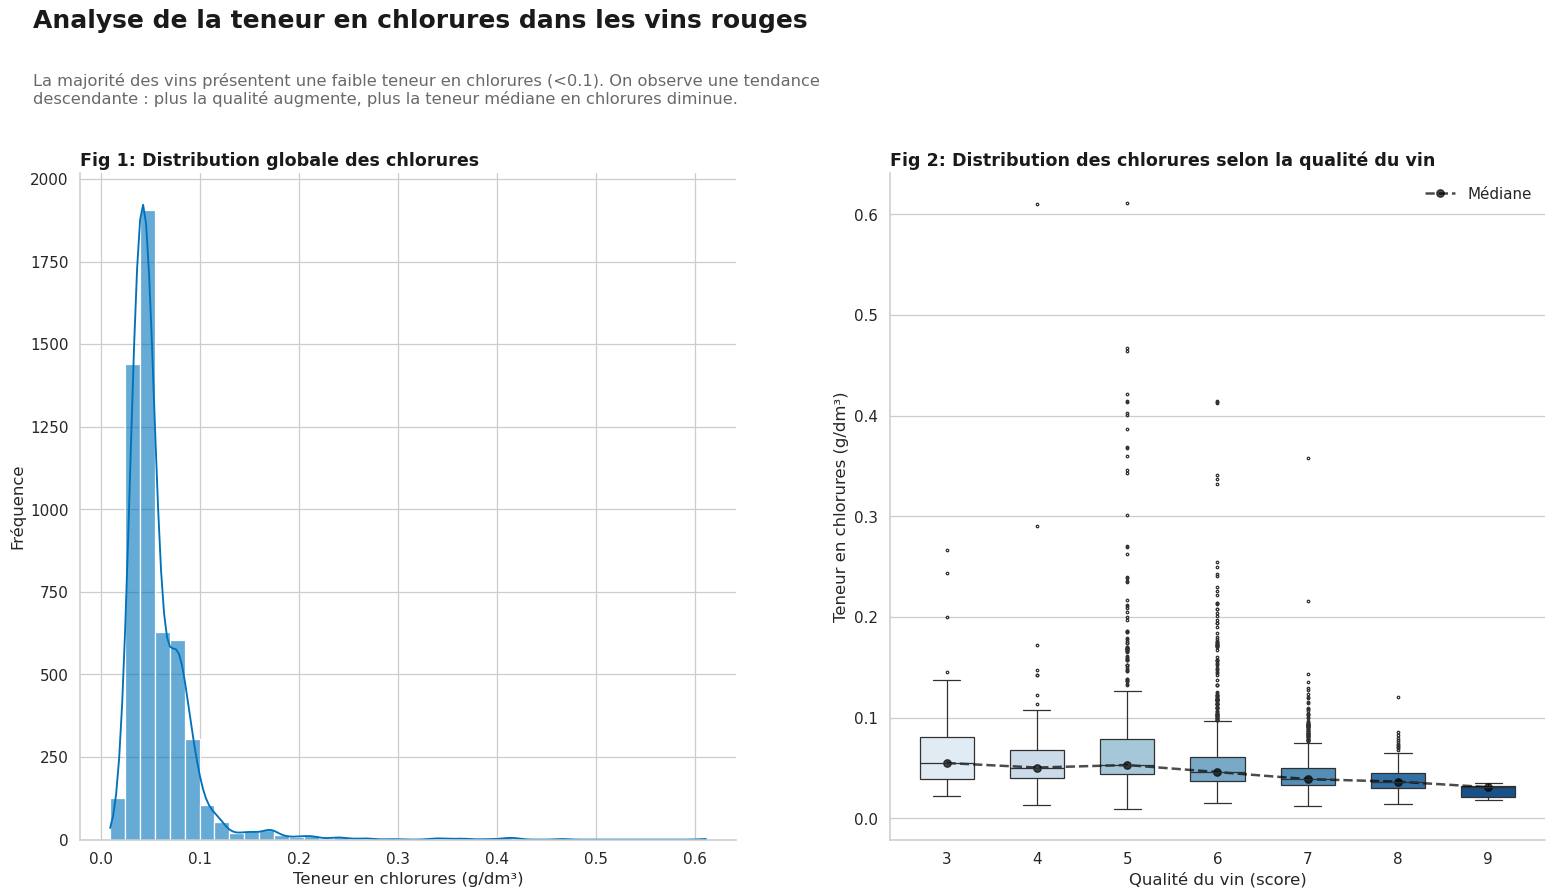

In [602]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# --- Style global ---
sns.set_theme(style="whitegrid", font_scale=1.1)

fig = plt.figure(figsize=(21, 11), dpi=90)
gs = fig.add_gridspec(24, 24)
gs.update(wspace=0.9, hspace=0.1)

# Subplots
ax1 = fig.add_subplot(gs[3:24, 0:11])   # Histogramme
ax2 = fig.add_subplot(gs[3:24, 13:24])  # Boxplot

# === Histogramme global ===
sns.histplot(
    data=df,
    x="chlorides",
    kde=True,
    bins=40,
    alpha=0.6,
    color="#0072BC",
    ax=ax1
)
ax1.set_title("Fig 1: Distribution globale des chlorures", fontsize=14, loc="left", weight="bold", color="#1a1a1a")
ax1.set_xlabel("Teneur en chlorures (g/dm³)")
ax1.set_ylabel("Fréquence")
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

# === Boxplot par qualité ===
palette = sns.color_palette("Blues", n_colors=len(df["quality"].unique()))
sns.boxplot(
    data=df,
    x="quality",
    y="chlorides",
    palette=palette[0:7],
    ax=ax2,
    width=0.6,
    fliersize=2
)

# Ligne reliant les médianes
medians = df.groupby("quality")["chlorides"].median()
ax2.plot(
    range(len(medians)),
    medians.values,
    color="black",
    marker="o",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Médiane"
)

ax2.set_title("Fig 2: Distribution des chlorures selon la qualité du vin", fontsize=14, loc="left", weight="bold", color="#1a1a1a")
ax2.set_xlabel("Qualité du vin (score)")
ax2.set_ylabel("Teneur en chlorures (g/dm³)")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.legend(frameon=False, loc="upper right")

# === Titre global principal ===
fig.text(
    s="Analyse de la teneur en chlorures dans les vins rouges",
    fontsize=20,
    fontweight="bold",
    x=0.1, y=0.93, ha="left", color="#1a1a1a"
)

# === Sous-titre narratif ===
fig.suptitle(
    textwrap.fill(
        "La majorité des vins présentent une faible teneur en chlorures (<0.1). "
        "On observe une tendance descendante : plus la qualité augmente, "
        "plus la teneur médiane en chlorures diminue.",
        width=100
    ),
    fontsize=13,
    fontweight="regular",
    x=0.1, y=0.885, ha="left", color="dimgray"
)

# Ajustement layout
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

sns.reset_defaults()


La distribution est fortement asymétrique vers la droite, avec un pic important autour de 0.05 et une longue queue s'étendant vers des valeurs plus élevées. Cela indique que les valeurs de chlorures sont principalement concentrées à de faibles niveaux, avec quelques vins présentant des concentrations beaucoup plus élevées **(figure 1)**

Ces outliers représentent des vins avec une teneur en chlorures anormalement élevée par rapport à la majorité des vins de cette qualité. Bien qu'ils existent à différents niveaux de qualité, ils semblent proportionnellement plus fréquents ou avec des valeurs plus extrêmes dans les qualités inférieures à moyennes.**(figure 2**)


L'intervalle interquartile **(figure 2)**  sont plus larges pour les qualités inférieures, indiquant une plus grande variabilité dans la teneur en chlorures pour ces vins. Pour les qualités supérieures (7, 8, 9), les boîtes sont plus resserrées, suggérant que les valeurs de chlorures sont plus  généralement plus basse

La ligne pointillée reliant les médianes **(figure 2)** de chaque boxplot montre une tendance claire à la baisse. À mesure que la qualité du vin augmente, la teneur médiane en chlorures diminue. Les vins de qualité inférieure (3, 4, 5) ont des médianes de chlorures plus élevées que les vins de qualité supérieure (7, 8, 9)

#### Quels rôles joue le dioxyde de soufre libre dans le vin
Le dioxyde de soufre libre est une forme active de soufre utilisée dans le vin pour préserver sa fraîcheur et prévenir l’oxydation et la prolifération microbienne.

**Qu'est-ce que le dioxyde de soufre libre?**

Le dioxyde de soufre (SO₂) est un additif couramment utilisé en vinification pour ses propriétés antiseptiques et antioxydantes. Il existe sous deux formes principales dans le vin :

Dioxyde de soufre libre : c’est la portion de SO₂ disponible et active dans le vin, capable d’agir contre les micro-organismes et d’empêcher l’oxydation.
Dioxyde de soufre combiné : il est lié chimiquement à d'autres composants du vin (comme les composés phénoliques ou le sucre) et ne possède plus la même activité protectrice immédiate


Le SO₂ libre protège le vin des bactéries et levures indésirables qui pourraient altérer son goût ou provoquer des fermentations secondaires. Il limite aussi l’oxydation du vin, ce qui préserve ses arômes frais et fruités ainsi que sa couleur. C’est pourquoi il est souvent ajouté dès la vendange ou au cours de la vinification.


pour en savoir plus : [lien](https://www.vignevin.com/wp-content/uploads/2021/11/2021-11-CItineraire30-sulfites-36p-V8_BAT.pdf)

##### Exist-il une rélation entre la teneure de sulfate de sodiom libre avec la qualité du vins

Ont sait que:

* Un peu est nécessaire =>  il protège le vin contre l’oxydation et contre les micro-organismes indésirables.

* Trop peu => : le vin devient fragile, il peut s’oxyder ou développer des défauts microbiologiques.

* Trop élevé  => le SO₂ devient perceptible (odeur piquante, goût désagréable), et c’est nocif pour la santé s’il dépasse certaines limites.

In [684]:
#free_sulfur_dioxide	total_sulfur_dioxide	density	pH	sulphates	alcohol

df_free_sulfur_dioxide = df.groupby("quality")["free_sulfur_dioxide"].mean().reset_index()
df_free_sulfur_dioxide.sort_values(by = "quality",ascending = True , inplace = True)
df_free_sulfur_dioxide = pd.DataFrame(df_free_sulfur_dioxide)
df_free_sulfur_dioxide

,quality,free_sulfur_dioxide
0,3,39.216667
1,4,20.332524
2,5,29.782125
3,6,30.777873
4,7,29.970175
5,8,33.108108
6,9,33.400000


In [674]:
df_free_sulfur_dioxide['quality']

,quality
0,3
6,9
5,8
3,6
4,7
2,5
1,4


In [682]:
df_free_sulfur_dioxide.sort_values(by="quality",ascending=True)

,quality,free_sulfur_dioxide
0,3,39.216667
1,4,20.332524
2,5,29.782125
3,6,30.777873
4,7,29.970175
5,8,33.108108
6,9,33.400000


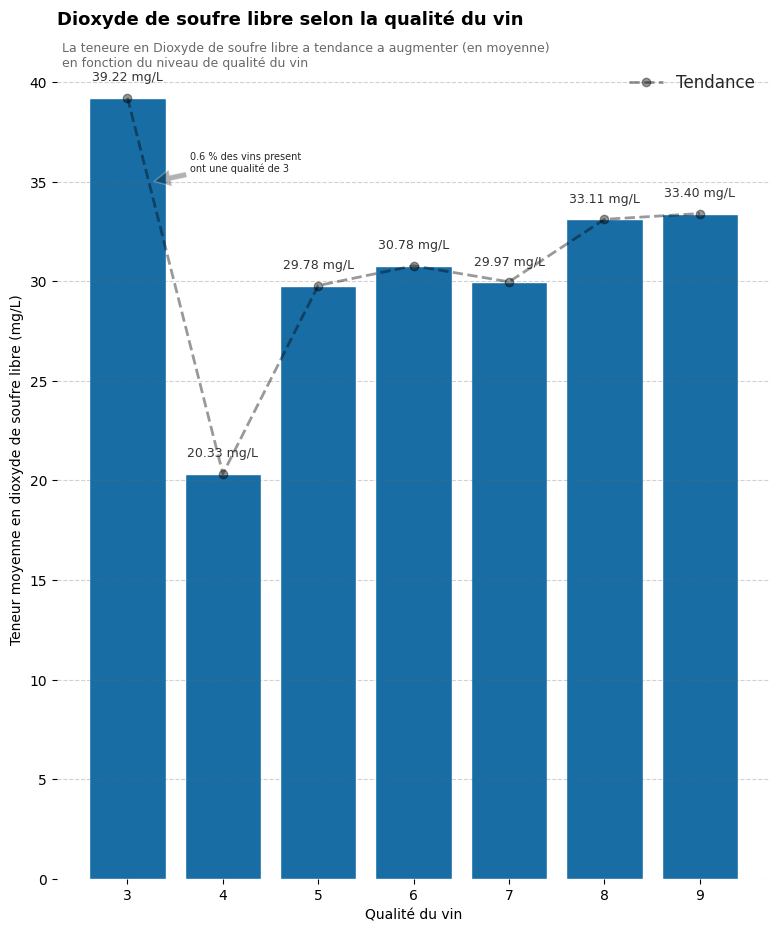

In [741]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,10))
sns.set_theme(style="whitegrid", font_scale=1.1)

sns.barplot(
    data=df_free_sulfur_dioxide,
    x="quality",
    y="free_sulfur_dioxide",
    color="#0072BC",
    ax=ax
)


# Ajouter les labels avec unités
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"{v.get_height():.2f} mg/L" for v in container],
        label_type='edge',
        fontsize=9,
        padding=10,
        color="#333333"
    )

# Nettoyage style
for spines in ax.spines.values():
    spines.set_visible(False)

ax.yaxis.grid(True, ls='--', alpha=0.3, color="dimgray")
ax.set_xlabel("Qualité du vin", fontsize=10)
ax.set_ylabel("Teneur moyenne en dioxyde de soufre libre (mg/L)", fontsize=10)

ax.set_title("Dioxyde de soufre libre selon la qualité du vin", fontsize=13, weight="bold", loc="left",pad =25)
mean = df_free_sulfur_dioxide["free_sulfur_dioxide"]
ax.plot(
        range(len(mean)),
        mean,
        color="black",
        marker="o",
        linestyle="--",
        linewidth=2,
        alpha=0.4,
        label="Tendance"
)
ax.legend( loc="upper right",frameon=False)
fig.suptitle(
    textwrap.fill(
        "La teneure en Dioxyde de soufre libre a tendance a augmenter (en moyenne) en fonction du niveau de qualité du vin ",
        width=75
    ),
    fontsize=9,
    fontweight="regular",
    color="dimgray",
    x=0.09, y=0.9, ha="left"
    )

anote = textwrap.fill('0.6 % des vins present ont une qualité de 3' ,25)
ax.annotate(anote, xy=(0.27, 35), xytext=(0.66, 35.5),size=7,
            arrowprops=dict(facecolor='black', shrink=0.02 , alpha=0.3))
# ax.set_ylim(0,50)
plt.tight_layout()
plt.show()
sns.reset_defaults()


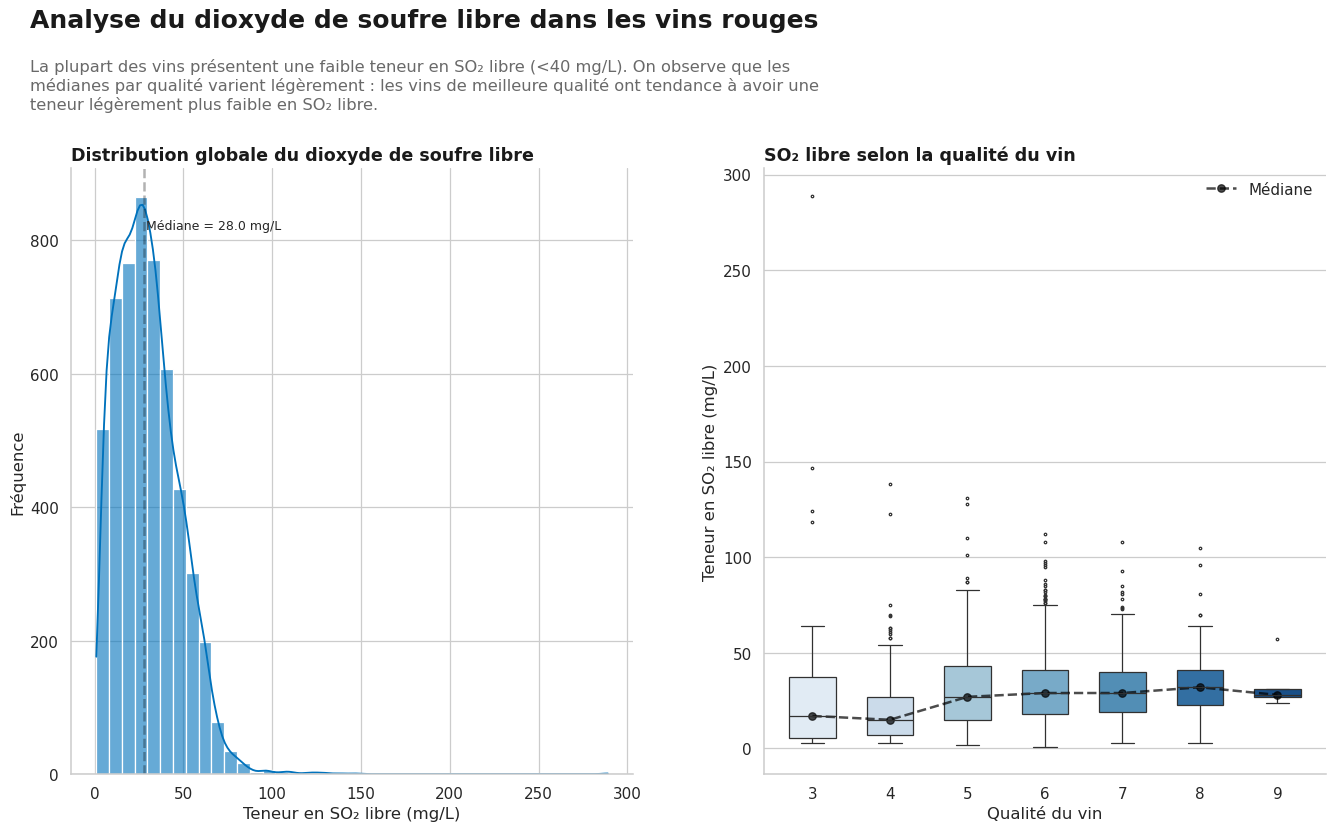

In [742]:

# --- Style global ---
sns.set_theme(style="whitegrid", font_scale=1.1)

fig = plt.figure(figsize=(18,10), dpi=90)
gs = fig.add_gridspec(24,24)
gs.update(wspace=0.8, hspace=0.1)

# Subplots
ax1 = fig.add_subplot(gs[3:24, 0:11])   # Histogramme
ax2 = fig.add_subplot(gs[3:24, 13:24])  # Boxplot

# === Histogramme global ===
sns.histplot(
    data=df,
    x="free_sulfur_dioxide",
    kde=True,
    bins=40,
    alpha=0.6,
    color="#0072BC",
    ax=ax1
)
median_free = df["free_sulfur_dioxide"].median()
ax1.axvline(median_free, color="black", linestyle="--", lw=2, alpha=0.3)
ax1.text(median_free + 1, ax1.get_ylim()[1]*0.9, f"Médiane = {median_free:.1f} mg/L", fontsize=10)

ax1.set_title("Distribution globale du dioxyde de soufre libre", fontsize=14, loc="left", weight="bold", color="#1a1a1a")
ax1.set_xlabel("Teneur en SO₂ libre (mg/L)")
ax1.set_ylabel("Fréquence")
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

# === Boxplot par qualité ===
sns.boxplot(
    data=df,
    x="quality",
    y="free_sulfur_dioxide",
    palette=palette[0:7],
    ax=ax2,
    width=0.6,
    fliersize=2
)
# Ligne des médianes
medians = df.groupby("quality")["free_sulfur_dioxide"].median()
ax2.plot(
    range(len(medians)),
    medians.values,
    color="black",
    marker="o",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Médiane"
)

ax2.set_title("SO₂ libre selon la qualité du vin", fontsize=14, loc="left", weight="bold", color="#1a1a1a")
ax2.set_xlabel("Qualité du vin")
ax2.set_ylabel("Teneur en SO₂ libre (mg/L)")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.legend(frameon=False, loc="upper right")

# === Titre global et sous-titre narratif ===
fig.text(
    s="Analyse du dioxyde de soufre libre dans les vins rouges",
    fontsize=20,
    fontweight="bold",
    x=0.1, y=0.94, ha="left", color="#1a1a1a"
)
fig.suptitle(
    textwrap.fill(
        "La plupart des vins présentent une faible teneur en SO₂ libre (<40 mg/L). "
        "On observe que les médianes par qualité varient légèrement : les vins de meilleure qualité ont tendance "
        "à avoir une teneur légèrement plus faible en SO₂ libre.",
        width=100
    ),
    fontsize=13,
    fontweight="regular",
    x=0.1, y=0.905, ha="left", color="dimgray"
)

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

sns.reset_defaults()


In [651]:
df.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


**Interprétation de la distribution du dioxyde de soufre libre par qualité de vin :**

Le dernier graphique visualise la distribution du dioxyde de soufre libre (SO₂ libre) dans les vins en fonction de leur qualité.

*   **Histogramme global (à gauche)** : L'histogramme de gauche montre la distribution globale du SO₂ libre. La distribution est fortement asymétrique à droite, avec la majorité des vins ayant une teneur en SO₂ libre relativement faible (la médiane est autour de 28 mg/L, comme indiqué sur le graphique). Il y a une longue queue s'étendant vers des valeurs de SO₂ libre plus élevées, indiquant la présence de vins avec des concentrations plus importantes.

*   **Boxplot par qualité (à droite)** : Le boxplot de droite présente la distribution du SO₂ libre pour chaque niveau de qualité de vin (de 3 à 9).
    *   **Tendance des médianes** : La ligne pointillée reliant les médianes montre une légère variation entre les niveaux de qualité, mais pas une tendance linéaire aussi claire que pour l'acidité volatile ou les chlorures. Les médianes se situent généralement entre 20 et 35 mg/L. La qualité 3 a une médiane élevée (autour de 39), la qualité 4 une médiane plus basse (autour de 20), et les qualités 5 à 9 ont des médianes qui varient autour de 30-33 mg/L.
    *   **Dispersion** : Les boîtes (IQR) et les moustaches indiquent une variabilité significative du SO₂ libre au sein de chaque niveau de qualité, en particulier pour les qualités 3 à 7. Les qualités 8 et 9 semblent avoir une variabilité légèrement plus faible.
    *   **Outliers** : De nombreux outliers sont présents, représentant des vins avec des teneurs en SO₂ libre beaucoup plus élevées que la majorité des vins de leur qualité. Ces outliers sont particulièrement visibles dans les qualités 5, 6 et 7.

**En résumé :**

Contrairement à l'acidité volatile et aux chlorures, le dioxyde de soufre libre ne présente pas une relation monotone simple avec la qualité du vin dans cet ensemble de données. Bien qu'il y ait des variations dans la teneur moyenne ou médiane entre les qualités, il n'y a pas de tendance claire et constante à l'augmentation ou à la diminution avec l'amélioration de la qualité. La présence de nombreux outliers et la variabilité significative au sein des groupes suggèrent que le niveau de SO₂ libre peut varier considérablement indépendamment de la qualité perçue, bien que des niveaux très bas (comme la qualité 4) ou très élevés (comme la qualité 3, bien que basée sur peu d'échantillons) puissent être associés à des qualités moindres. Pour les vins de qualité moyenne à supérieure (5 à 9), la teneur en SO₂ libre semble se situer dans une plage similaire.